In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
import boto3
bucket_name = 'dataminds-warehouse'
s3_file_key = 'HousingPrices-Amsterdam-August-2021.csv'            # e.g. 'folder/myfile.txt'
local_file_path = 'HousingPrices-Amsterdam-August-2021.csv'        # Local destination

# Create an S3 client (remove `bucket_name` here — not a valid argument for boto3.client)
s3 = boto3.client(
    's3',
    region_name='us-east-1'
    # aws_access_key_id='your_access_key',
    # aws_secret_access_key='your_secret_key'
)

# Download the file
try:
    s3.download_file(bucket_name, s3_file_key, local_file_path)
    print(f"✅ File downloaded successfully from s3://{bucket_name}/{s3_file_key} to {local_file_path}")
except Exception as e:
    print("❌ Error downloading file:", e)
    

✅ File downloaded successfully from s3://dataminds-warehouse/HousingPrices-Amsterdam-August-2021.csv to HousingPrices-Amsterdam-August-2021.csv


In [94]:
#Univariate analysis of housing prices in Amsterdam


In [6]:
housing_data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")

In [18]:
housing_data.columns

Index(['Address', 'Price'], dtype='object')

In [7]:
housing_data.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [19]:
housing_data['Price'].describe()

count    9.200000e+02
mean     6.220654e+05
std      5.389942e+05
min      1.750000e+05
25%      3.500000e+05
50%      4.670000e+05
75%      7.000000e+05
max      5.950000e+06
Name: Price, dtype: float64

In [20]:
housing_data['Address'].describe()

count                           924
unique                          919
top       Nieuwevaartweg, Amsterdam
freq                              2
Name: Address, dtype: object

In [8]:
housing_data = housing_data[['Address','Price']]

In [10]:
housing_data.head()

,Address,Price
0,"Blasiusstraat 8 2, Amsterdam",685000.0
1,"Kromme Leimuidenstraat 13 H, Amsterdam",475000.0
2,"Zaaiersweg 11 A, Amsterdam",850000.0
3,"Tenerifestraat 40, Amsterdam",580000.0
4,"Winterjanpad 21, Amsterdam",720000.0


In [11]:
housing_data.tail()

,Address,Price
919,"Ringdijk, Amsterdam",750000.0
920,"Kleine Beerstraat 31, Amsterdam",350000.0
921,"Stuyvesantstraat 33 II, Amsterdam",350000.0
922,"John Blankensteinstraat 51, Amsterdam",599000.0
923,"S. F. van Ossstraat 334, Amsterdam",300000.0


In [12]:
housing_data.shape

(924, 2)

In [15]:
housing_data.dtypes

Address     object
Price      float64
dtype: object

Index(['Address', 'Price'], dtype='object')

'\nfrom the image and code we can see histogram where  x is prices of the houses and data is count and it overall shows distribution of prices. \nEach bar shows number of houses falling in specific price range. As we might see the graph has right skewed distribution, which shows that most of the houses are cheaper\nand have prices below 1 million, and less houses are expensive. In addition to that there are some outliers in 5 or 6 million.\n'

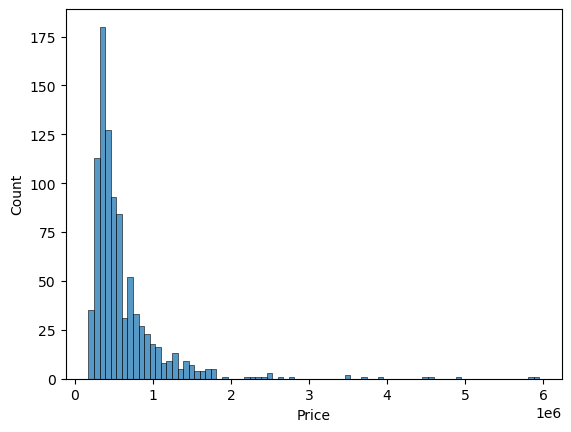

In [32]:
sns.histplot( data = housing_data, x= housing_data["Price"])
'''
From the image and code, we can see a histogram where x is the prices of the houses and data is the count, and it overall shows the distribution of prices.
Each bar shows the number of houses falling in a specific price range. 
As we might see, the graph has a right-skewed distribution, which shows that most of the houses are cheaper, and have prices below 1 million, and fewer houses are expensive. 
In addition to that, there are some outliers in 5 or 6 million.
'''




<Axes: xlabel='Count', ylabel='Price'>

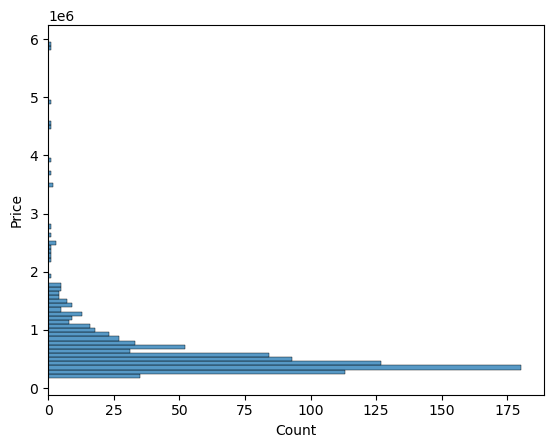

In [28]:
sns.histplot( data = housing_data, y= housing_data["Price"])
#this is exact same graph but as we tested in class I changed places of x and y.  here y representes price but overall we can see that distribution is pretty much the same.

Text(0.5, 1.0, 'Analysis of Housing prices')

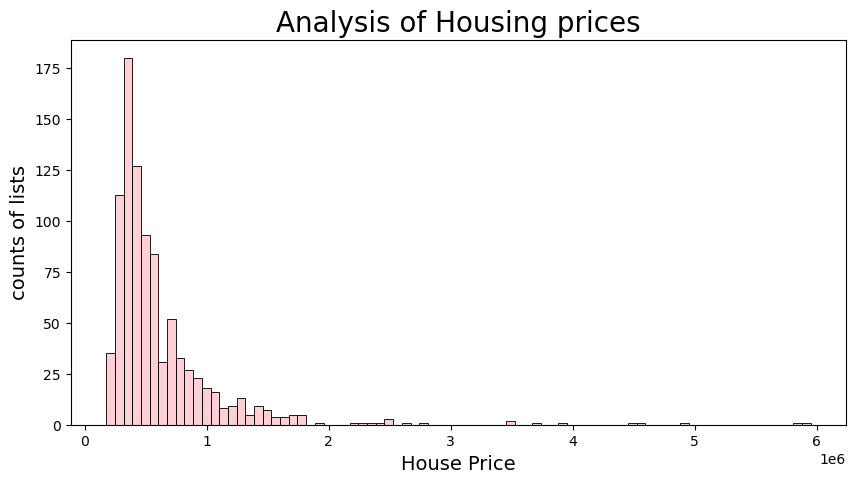

In [40]:
plt.figure(figsize=(10,5))
z=sns.histplot( data = housing_data, x= housing_data["Price"], color='Pink')
z.set_xlabel('House Price', fontsize=14)
z.set_ylabel('counts of lists', fontsize=14)
z.set_title('Analysis of Housing prices', fontsize=20)

#this histogram is also same with the previous one I explained but here in difference I have set width and height and also color so it is aecthetically more pleasant. Overall data distribution is again right skewed and we see outliers too and there is no difference from the other one.

In [50]:
housing_data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv") # I reread the data as it had dropped the other columns last time

In [51]:
housing_data = housing_data[['Address','Price','Area','Room']]

In [52]:
housing_data.head()

,Address,Price,Area,Room
0,"Blasiusstraat 8 2, Amsterdam",685000.0,64,3
1,"Kromme Leimuidenstraat 13 H, Amsterdam",475000.0,60,3
2,"Zaaiersweg 11 A, Amsterdam",850000.0,109,4
3,"Tenerifestraat 40, Amsterdam",580000.0,128,6
4,"Winterjanpad 21, Amsterdam",720000.0,138,5


In [56]:
housing_data.head()

,Address,Price,Area,Room
0,"Blasiusstraat 8 2, Amsterdam",685000.0,64,3
1,"Kromme Leimuidenstraat 13 H, Amsterdam",475000.0,60,3
2,"Zaaiersweg 11 A, Amsterdam",850000.0,109,4
3,"Tenerifestraat 40, Amsterdam",580000.0,128,6
4,"Winterjanpad 21, Amsterdam",720000.0,138,5


In [55]:
housing_data.tail()

,Address,Price,Area,Room
919,"Ringdijk, Amsterdam",750000.0,117,1
920,"Kleine Beerstraat 31, Amsterdam",350000.0,72,3
921,"Stuyvesantstraat 33 II, Amsterdam",350000.0,51,3
922,"John Blankensteinstraat 51, Amsterdam",599000.0,113,4
923,"S. F. van Ossstraat 334, Amsterdam",300000.0,79,4


In [57]:
housing_data.head

<bound method NDFrame.head of                                     Address     Price  Area  Room
0              Blasiusstraat 8 2, Amsterdam  685000.0    64     3
1    Kromme Leimuidenstraat 13 H, Amsterdam  475000.0    60     3
2                Zaaiersweg 11 A, Amsterdam  850000.0   109     4
3              Tenerifestraat 40, Amsterdam  580000.0   128     6
4                Winterjanpad 21, Amsterdam  720000.0   138     5
..                                      ...       ...   ...   ...
919                     Ringdijk, Amsterdam  750000.0   117     1
920         Kleine Beerstraat 31, Amsterdam  350000.0    72     3
921       Stuyvesantstraat 33 II, Amsterdam  350000.0    51     3
922   John Blankensteinstraat 51, Amsterdam  599000.0   113     4
923      S. F. van Ossstraat 334, Amsterdam  300000.0    79     4

[924 rows x 4 columns]>

In [58]:
housing_data.describe()

,Price,Area,Room
count,9.200000e+02,924.000000,924.000000
mean,6.220654e+05,95.952381,3.571429
std,5.389942e+05,57.447436,1.592332
min,1.750000e+05,21.000000,1.000000
25%,3.500000e+05,60.750000,3.000000
50%,4.670000e+05,83.000000,3.000000
75%,7.000000e+05,113.000000,4.000000
max,5.950000e+06,623.000000,14.000000


<Axes: xlabel='Price'>

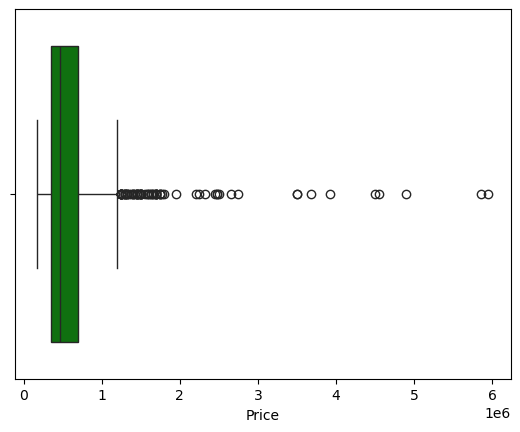

In [60]:
sns.boxplot(data = housing_data, x= housing_data["Price"], color='Green')
'''
Again this shows distribution of prices in dataset. The box shows IQR where half the data is within q1 and q3. The line inside the box shows median.
As mentioned in class 1.5 IQR is outlier detector, which is from Q1 and Q3 (the other 2 lines). And this part shows normal range of values. 
Dots coming after the lines are outliers. This graph is the same representation of histogram, but this one is different visually. Also I used color green here.
'''

'\nAgain dark green part is representation of IQR range from Q1 to Q3. The median is a bit closer to top. The extra circles are outliers. \nAll other features of it are same with other boxplots.\n'

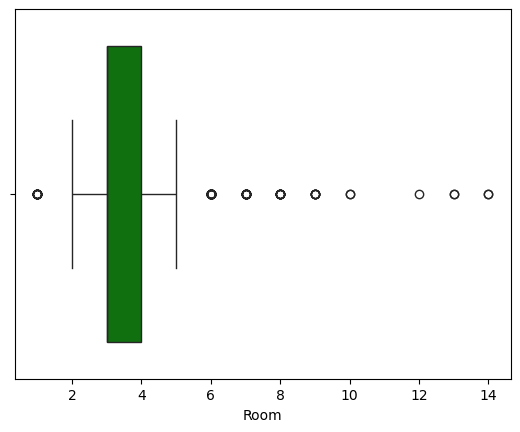

In [68]:
sns.boxplot(data = housing_data, x= housing_data["Room"], color='Green')
'''
Again dark green part is representation of IQR range from Q1 to Q3. The median is a bit closer to top. The extra circles are outliers. 
All other features of it are same with other boxplots.
'''

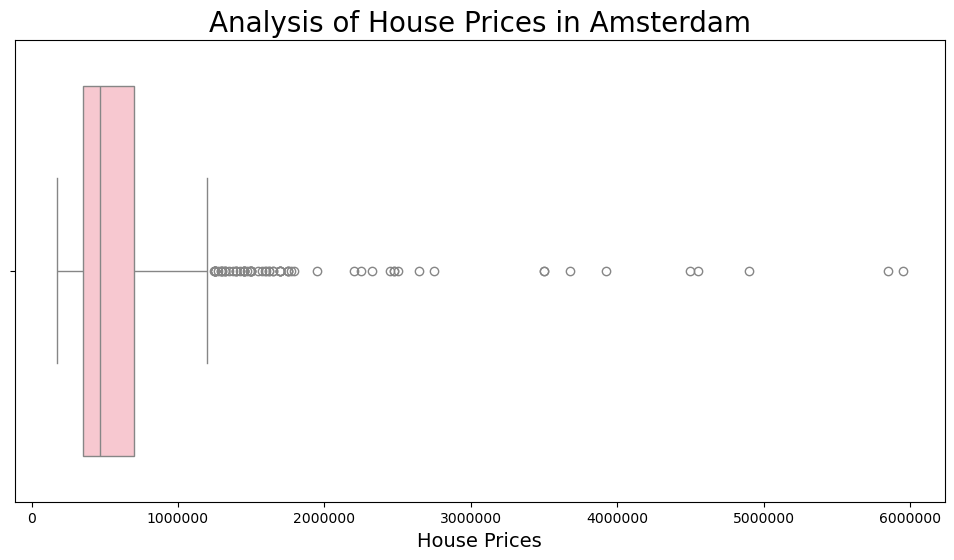

In [63]:
plt.figure(figsize= (12,6))

ax = sns.boxplot(data = housing_data, x= housing_data["Price"], color='Pink')
ax.set_xlabel('House Prices',fontsize = 14)
ax.set_title('Analysis of House Prices in Amsterdam', fontsize= 20)

plt.ticklabel_format(style='plain', axis='x')
#same as 2 above but this one is more stylish

<Axes: xlabel='Price'>

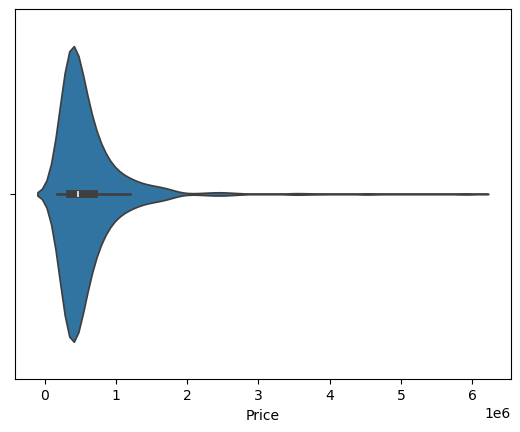

In [64]:
sns.violinplot(data = housing_data, x= housing_data["Price"])
'''
This feature is again a different representation of the same future. But it additionally shows the probability density of data. 
The narrow black part of the diagram represents the IQR, and in the white part there is the median. 
We can see that this is pretty skewed, and this was visible in the histogram representation of this too. 
Again, as it was visible in other graphs, we can see that here most of the houses are in an affordable range.
'''

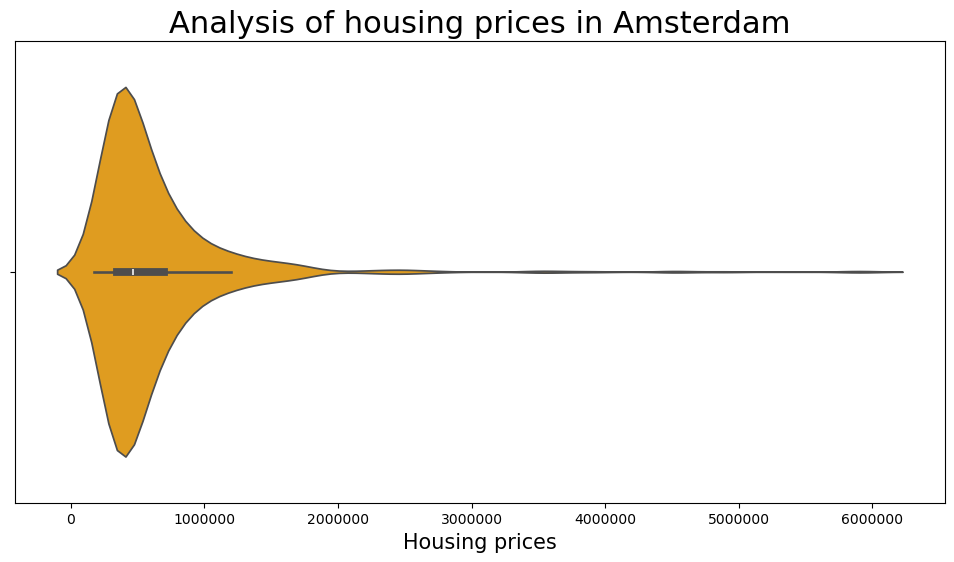

In [66]:
plt.figure(figsize= (12,6))

ax = sns.violinplot(data = housing_data, x= housing_data["Price"], color='Orange')
ax.set_xlabel('Housing prices',fontsize = 15)
ax.set_title('Analysis of housing prices in Amsterdam', fontsize= 22)
plt.ticklabel_format(style='plain', axis='x')

#as I have stated a few times this is just more pleasant and visually better representation including all the features from above graph.

In [70]:
#summary table
housing_data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")
housing_data = housing_data[['Zip','Price']]

In [71]:
housing_data.head() #shows first a few rows of dataframe

,Zip,Price
0,1091 CR,685000.0
1,1059 EL,475000.0
2,1097 SM,850000.0
3,1060 TH,580000.0
4,1036 KN,720000.0


In [72]:
housing_data.tail() #shows last a few rows of dataframe

,Zip,Price
919,1097 AE,750000.0
920,1033 CP,350000.0
921,1058 AK,350000.0
922,1095 MB,599000.0
923,1068 JS,300000.0


In [74]:
housing_data.shape #sis a tuple representing dimensions

(924, 2)

In [76]:
housing_data.dtypes

Zip       object
Price    float64
dtype: object

In [77]:
housing_data.describe() #gives quick representation of dataset mean std and other features that we need to know. Basically it is descriptive statistics.

,Price
count,9.200000e+02
mean,6.220654e+05
std,5.389942e+05
min,1.750000e+05
25%,3.500000e+05
50%,4.670000e+05
75%,7.000000e+05
max,5.950000e+06


<Axes: xlabel='Price', ylabel='count'>

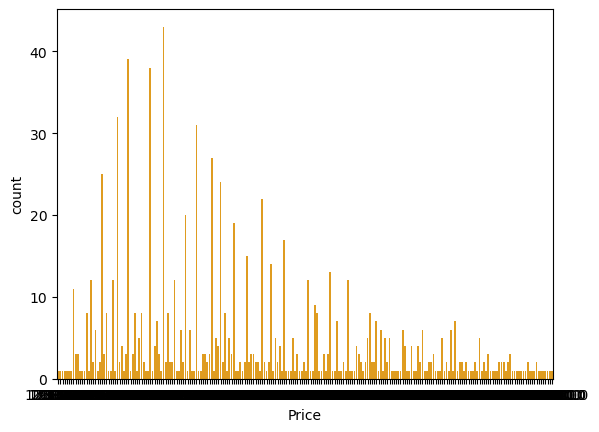

In [80]:
sns.countplot(data = housing_data, x= housing_data["Price"], color='Orange')
'''
shows the frequency of happening for price values within the =dataset. The mostly visible ones are lower prices and they show dominance.
By increase in price count is getting less as in other representations. Also the skew is clearly presented in countplot.

'''

Text(0.5, 1.0, 'Analysis of housing prices')

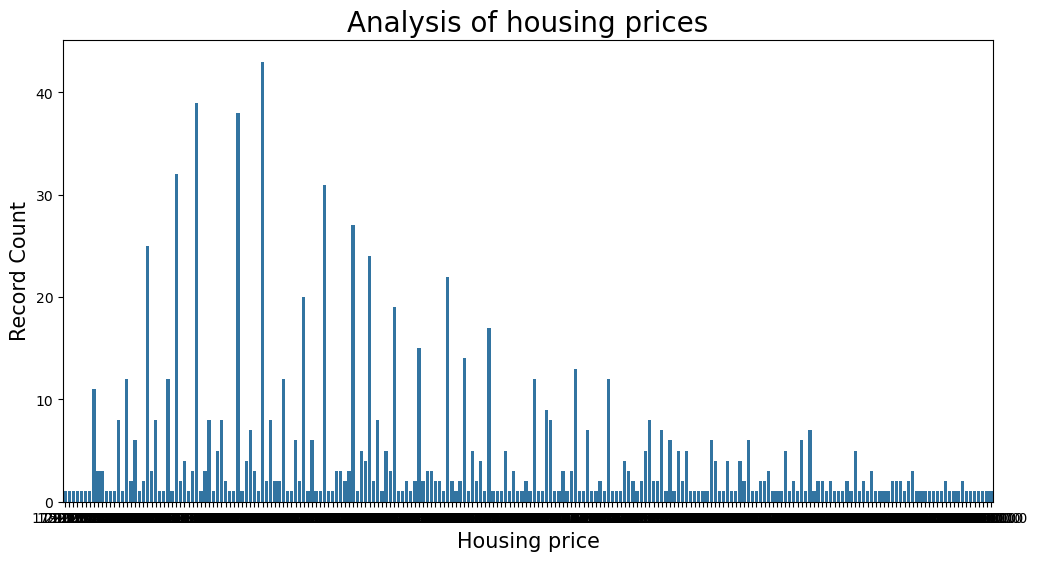

In [82]:
plt.figure(figsize= (12,6))

z = sns.countplot(data = housing_data, x= housing_data['Price'])
z.set_xlabel('Housing price',fontsize = 15)
z.set_ylabel('Record Count',fontsize = 15)
z.set_title('Analysis of housing prices', fontsize= 20)
#here just width and height changed making appearance more clear

In [83]:
housing_data = housing_data[['Zip','Price']]

In [86]:
housing_group = housing_data.groupby('Price').count()
housing_group

,Zip
Price,
175000.0,1
179000.0,1
199000.0,1
200000.0,1
209000.0,1
...,...
4495000.0,1
4550000.0,1
4900000.0,1


In [87]:
housing_group= housing_group.reset_index()
housing_group

,Price,Zip
0,175000.0,1
1,179000.0,1
2,199000.0,1
3,200000.0,1
4,209000.0,1
...,...,...
221,4495000.0,1
222,4550000.0,1
223,4900000.0,1
224,5850000.0,1


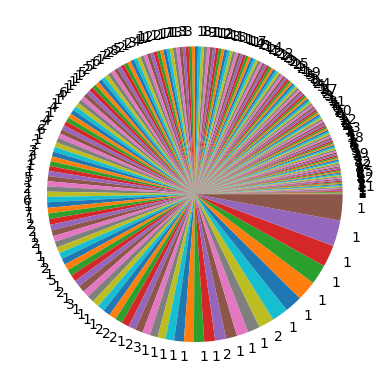

In [90]:
plt.pie(housing_group["Price"], labels =housing_group['Zip'])
plt.show()
'''
The size of each slice is from the values in the price part. Larger pieces in the pie represent things that appeared more frequently.
The main disadvantage of a pie chart is the fact that it is highly hard to read due to the large price numbers. 
Also, there are overlapping parts, which makes this representation not the best.
'''

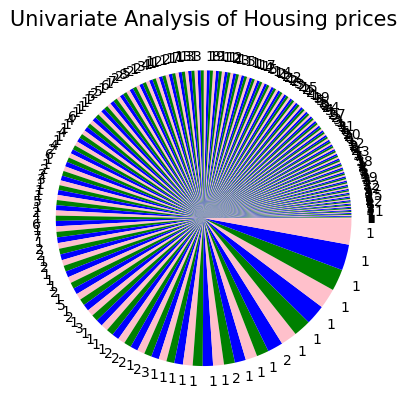

In [92]:
cols = ['pink', 'green', 'blue']

plt.pie(housing_group["Price"], labels =housing_group['Zip'],colors = cols)

plt.title('Univariate Analysis of Housing prices', fontsize=15)
plt.show()

#again as explained above same thing but different coloring and better visually

In [95]:
housing_data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")

In [96]:
housing_data = housing_data[['Address','Price','Room']]

In [97]:
housing_data.head()

,Address,Price,Room
0,"Blasiusstraat 8 2, Amsterdam",685000.0,3
1,"Kromme Leimuidenstraat 13 H, Amsterdam",475000.0,3
2,"Zaaiersweg 11 A, Amsterdam",850000.0,4
3,"Tenerifestraat 40, Amsterdam",580000.0,6
4,"Winterjanpad 21, Amsterdam",720000.0,5


In [98]:
housing_data.tail()

,Address,Price,Room
919,"Ringdijk, Amsterdam",750000.0,1
920,"Kleine Beerstraat 31, Amsterdam",350000.0,3
921,"Stuyvesantstraat 33 II, Amsterdam",350000.0,3
922,"John Blankensteinstraat 51, Amsterdam",599000.0,4
923,"S. F. van Ossstraat 334, Amsterdam",300000.0,4


In [99]:
housing_data.shape

(924, 3)

In [100]:
housing_data.dtypes

Address     object
Price      float64
Room         int64
dtype: object

<Axes: xlabel='Price', ylabel='Room'>

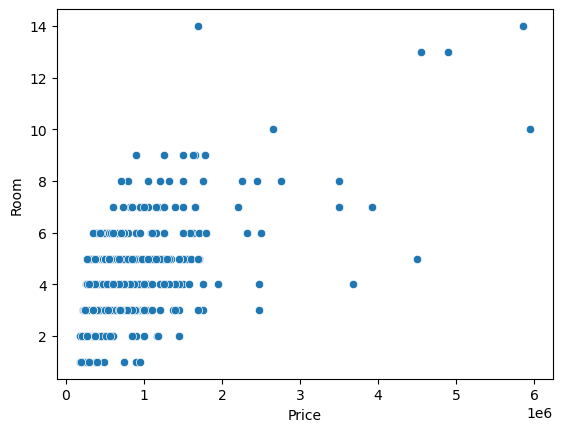

In [101]:
sns.scatterplot(data = housing_data, x= housing_data["Price"], y= housing_data['Room'])
'''
It shows the relationship between two numerical values, price and room. Each plot represents a single correspondence. 
The correlation between these two seems mainly positive, though we can't say that it is linear. 
Mainly houses with more rooms have a higher price, but still there are some not following the rule. 
We can see wider rooms at higher prices.
'''

Text(0.5, 1.0, 'Bivariate analysis of Price and room in Amsterdam housings')

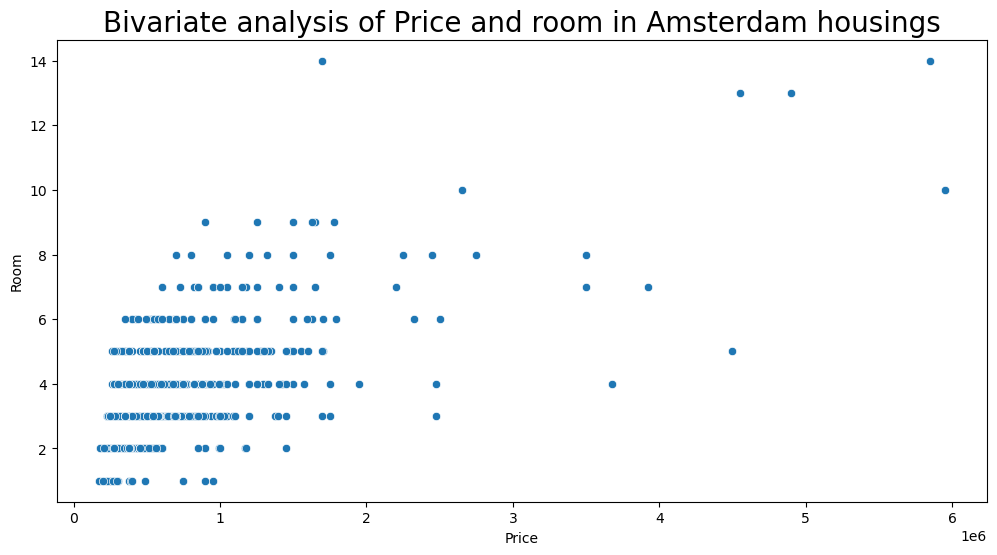

In [102]:
plt.figure(figsize= (12,6))

ax = sns.scatterplot(data = housing_data, x= housing_data["Price"], y= housing_data['Room'])
ax.set_title('Bivariate analysis of Price and room in Amsterdam housings', fontsize= 20)

In [103]:
housing_data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")

In [104]:
housing_data = housing_data[['Address','Price','Area']]

In [106]:
housing_data.dtypes

Address     object
Price      float64
Area         int64
dtype: object

In [107]:
housing_data.shape

(924, 3)

In [114]:
pd.crosstab(index= housing_data['Address'], columns= housing_data['Price'])
#It is a function that shows table relation between 2+ values.

Price,175000.0,179000.0,199000.0,200000.0,209000.0,210000.0,215000.0,225000.0,230000.0,235000.0,...,2650000.0,2750000.0,3500000.0,3680000.0,3925000.0,4495000.0,4550000.0,4900000.0,5850000.0,5950000.0
Address,,,,,,,,,,,,,,,,,,,,,
"'t Nopeind 2, Amsterdam",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1e Kekerstraat 119, Amsterdam",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1e Kekerstraat 77 PP, Amsterdam",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Aalbersestraat 232, Amsterdam",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Aalsmeerweg 112 II, Amsterdam",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zuideinde 417, Amsterdam",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Zuidelijke Wandelweg 151 PP, Amsterdam",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Zuidelijke Wandelweg 151, Amsterdam",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
housing_data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")

In [116]:
housing_data = housing_data[['Address','Price','Zip']]

In [118]:
housing_data.head()


,Address,Price,Zip
0,"Blasiusstraat 8 2, Amsterdam",685000.0,1091 CR
1,"Kromme Leimuidenstraat 13 H, Amsterdam",475000.0,1059 EL
2,"Zaaiersweg 11 A, Amsterdam",850000.0,1097 SM
3,"Tenerifestraat 40, Amsterdam",580000.0,1060 TH
4,"Winterjanpad 21, Amsterdam",720000.0,1036 KN


In [121]:
pd.pivot_table(housing_data, values='Price', 
                                index='Zip',  
                                aggfunc=np.mean)

#Agg function here is way of summarising  either sum mean or count. 
#Index becomes rows and columns is columns. So mainly this one can be use for organising or grouping the data frame.

/tmp/ipykernel_178/75592949.py:1: FutureWarning: The provided callable <function mean at 0x7fa513ae5620> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(housing_data, values='Price',


,Price
Zip,
1011 AR,1425000.0
1011 AW,640000.0
1011 BG,469000.0
1011 BS,1500000.0
1011 DG,999500.0
...,...
1108 BR,325000.0
1108 CA,300000.0
1108 CN,350000.0


In [124]:

pd.pivot_table(housing_data, values='Price', index='Zip',columns=['Address'], aggfunc="mean")
               # according to my assumptions I am getting all NaN due to uniqueness

Address,"'t Nopeind 2, Amsterdam","1e Kekerstraat 119, Amsterdam","1e Kekerstraat 77 PP, Amsterdam","Aalbersestraat 232, Amsterdam","Aalsmeerweg 112 II, Amsterdam","Aalsmeerweg 28 1, Amsterdam","Achillesstraat 113 2, Amsterdam","Admiraal De Ruijterweg 125 2, Amsterdam","Admiraal De Ruijterweg 301 2, Amsterdam","Admiraal De Ruijterweg 375 I, Amsterdam",...,"Zeeburgerdijk 585, Amsterdam","Zeeburgerdijk 64 I, Amsterdam","Zocherstraat 23 X, Amsterdam","Zuideinde 356, Amsterdam","Zuideinde 387 D, Amsterdam","Zuideinde 417, Amsterdam","Zuidelijke Wandelweg 151 PP, Amsterdam","Zuidelijke Wandelweg 151, Amsterdam","Zwanenplein 69, Amsterdam","ms. van Riemsdijkweg 266, Amsterdam"
Zip,,,,,,,,,,,,,,,,,,,,,
1011 AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011 AW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011 BG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011 BS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011 DG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108 BR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108 CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108 CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
pd.pivot_table(housing_data, values='Price', index='Zip', aggfunc='mean') #here as visible no NaNs

,Price
Zip,
1011 AR,1425000.0
1011 AW,640000.0
1011 BG,469000.0
1011 BS,1500000.0
1011 DG,999500.0
...,...
1108 BR,325000.0
1108 CA,300000.0
1108 CN,350000.0


In [130]:
housing_data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")


In [131]:
housing_data = housing_data[['Address','Price','Room','Zip']]

In [133]:
housing_data.shape

(924, 4)

In [136]:
housing_data.dtypes


Address     object
Price      float64
Room         int64
Zip         object
dtype: object

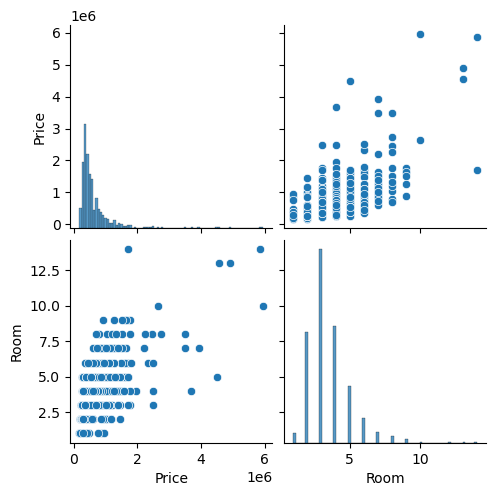

In [137]:
sns.pairplot( data = housing_data)
'''
The first one is a histogram showing the distribution of house prices. We can see higher concentration in lower prices. 
Scatter plots show price vs room and room vs price. They both are the same representation, just flipped. The last one is distribution of rooms.
'''

In [138]:
housing_data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")

housing_data = housing_data[['Address','Price','Zip']]

<Axes: xlabel='Address', ylabel='Price'>

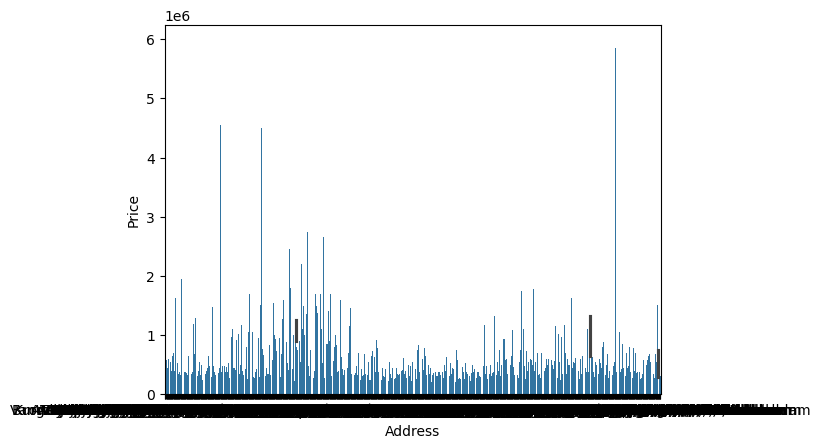

In [139]:
sns.barplot(
    data = housing_data,x=housing_data['Address'],
    y=housing_data['Price'],
    estimator = np.median)

#This visualizes the relationship between address and price. 
#In x we can see a lot of different addresses due to the range of the number of addresses,and y is the price of those. 
#Due to the huge number, it is not very readable. Each bar is simply a unique address. Black lines are confidence intervals.

<Axes: xlabel='Zip', ylabel='Price'>

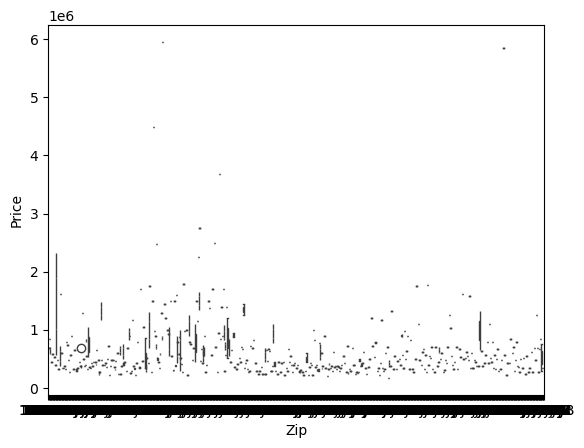

In [144]:
sns.boxplot( data = housing_data, x= housing_data['Zip'] ,  y= housing_data["Price"])
#It visualises distribution of Price for different zip addresses. 
#X has individual labels showing zips and y shows prices. 
#We can see the variation of prices depending on codes but still it is not much readable

Text(0.5, 1.0, 'Bivariate analysis of Housing prices')

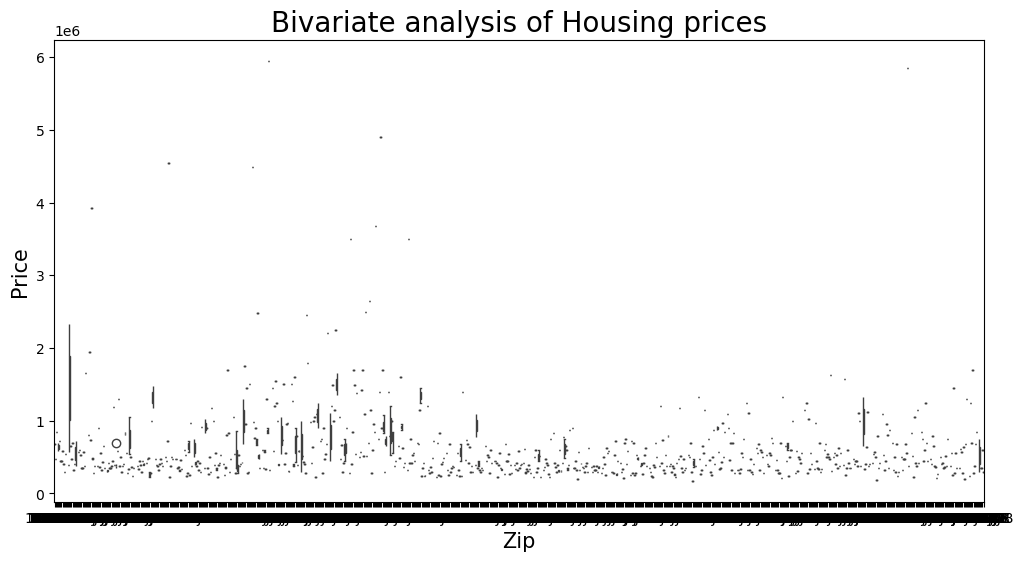

In [143]:
plt.figure(figsize= (12,6))

ax = sns.boxplot( data = housing_data, x= housing_data['Zip'] ,  y= housing_data["Price"])
ax.set_xlabel('Zip',fontsize = 15)
ax.set_ylabel('Price', fontsize = 15)
ax.set_title('Bivariate analysis of Housing prices', fontsize= 20)

In [145]:
housing_data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")

housing_data = housing_data[['Room','Price','Zip']]

<Axes: xlabel='Price', ylabel='Count'>

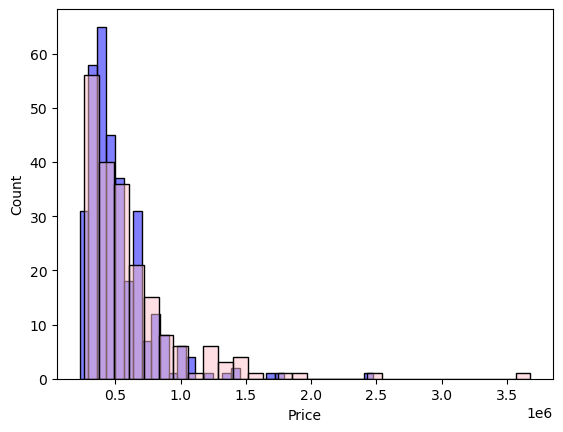

In [150]:
housing_data_3 = housing_data.loc[housing_data['Room']== 3,:]
housing_data_4 = housing_data.loc[housing_data['Room']== 4,:]

sns.histplot( data = housing_data_3, x= housing_data_3["Price"], alpha=0.5, color = 'blue')
sns.histplot( data = housing_data_4, x= housing_data_4["Price"], alpha=0.5, color = 'pink')

'''
Blue bars show the distribution of prices for houses with 3 rooms. Pink ones show the distribution of prices for houses with 4 rooms. 
And purple is the overlap. This shows a direct comparison of prices of houses with 3 vs 4 rooms. 
We can easily see that both distributions are right-skewed, which means most houses have lower prices. 
As we can see, their peaks are also different, and 4-room houses have a higher one, meaning higher prices for 4 rooms.
'''

Text(0.5, 1.0, 'Bivariate analysis of rooms')

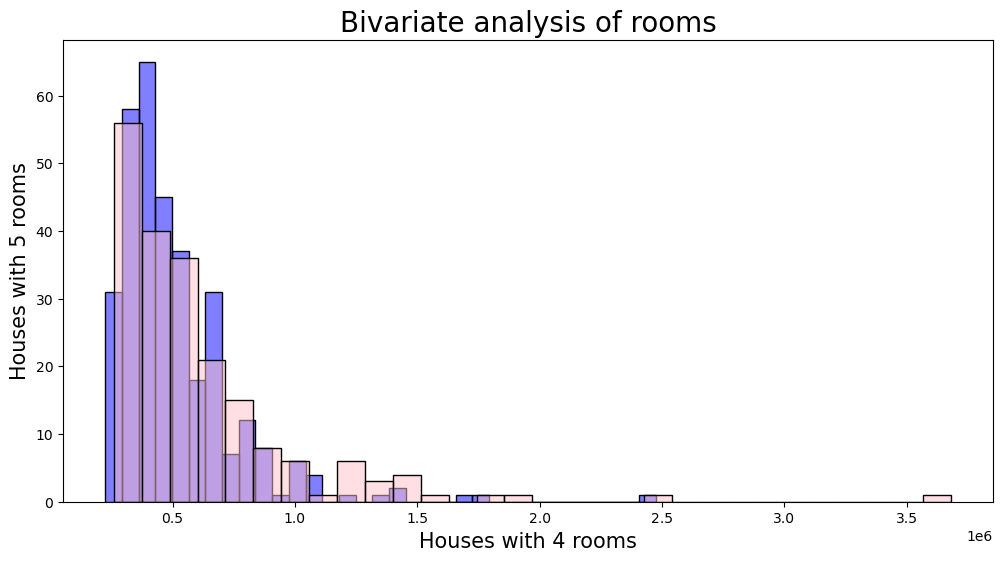

In [151]:
plt.figure(figsize= (12,6))

z=sns.histplot( data = housing_data_3, x= housing_data_3["Price"], alpha=0.5, color = 'blue')
z=sns.histplot( data = housing_data_4, x= housing_data_4["Price"], alpha=0.5, color = 'pink')

z.set_xlabel('Houses with 4 rooms',fontsize = 15)
z.set_ylabel('Houses with 5 rooms', fontsize = 15)
z.set_title('Bivariate analysis of rooms', fontsize= 20)

In [158]:
housing_data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")

housing_data = housing_data[['Price','Room']]

In [154]:
housing_data.dtypes

Price    float64
Room       int64
dtype: object

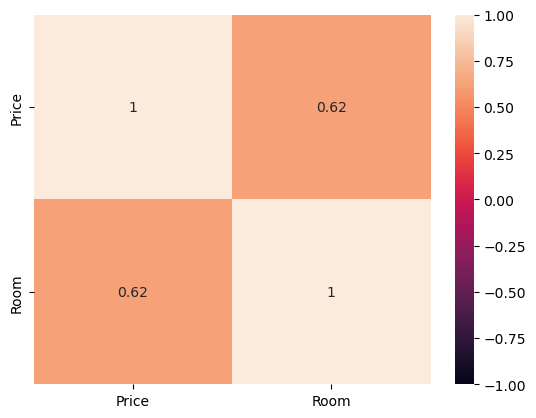

In [159]:
corr_of_houses = housing_data.corr()

heatmap = sns.heatmap(corr_of_houses, vmin=-1, vmax=1, annot=True)
#we mentioned in class that diagonals are always the same because it is correlation with itself
#The darker orange value indicates positive correlation between room and prive, which means as one increases other one also does.

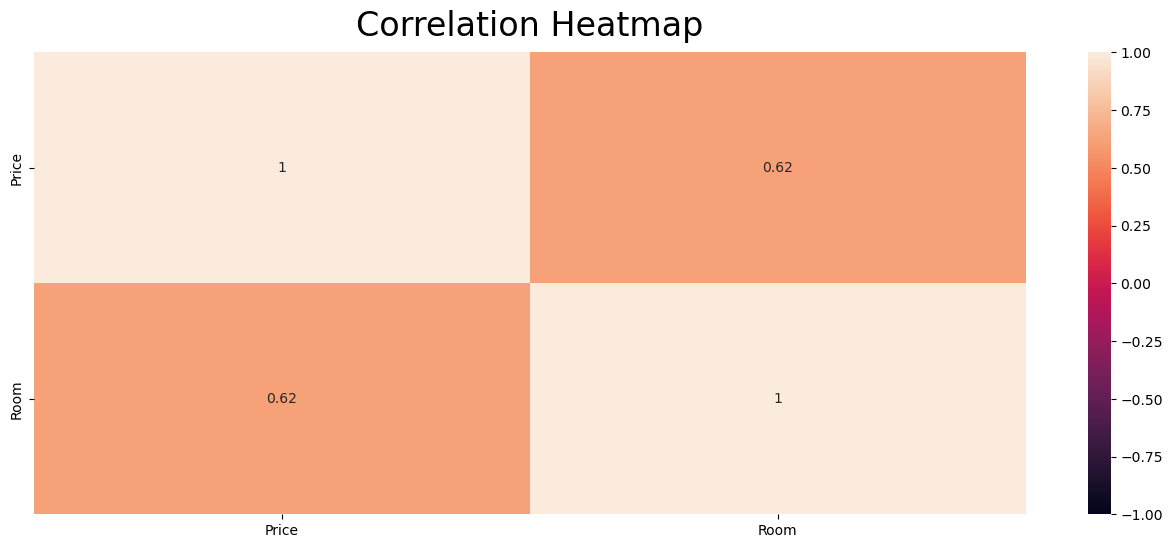

In [169]:

corr_of_houses = housing_data.corr()
plt.figure(figsize=(16, 6))

heatmap=sns.heatmap(corr_of_houses,vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=12);

#as visible this gives same results but is visually bigger.